In [1]:
import pandas as pd
from naive_bayes_custom import NaiveBayesCustom
from utils import tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary, getTrainingAndTestingData2, plot_wordclouds_per_class, display_results_table
from modelUtils import run_model2
from confusionMatrix import ConfusionMatrix

In [2]:
df_train = pd.read_csv("train.csv")
print(f"df_train.shape : {df_train.shape}")

print(df_train.head())

df_test = pd.read_csv("test.csv")
print(f"df_test.shape : {df_test.shape}")

print(df_test.head())

results = {}

df_train.shape : (140000, 3)
   label                              title  \
0      3                          Ernie Cox   
1     10                          Holosteum   
2      9                Pestarella tyrrhena   
3      1          MidSun Junior High School   
4      6  St James' Church Wrightington Bar   

                                             content  
0   Ernest Ernie Cox (February 17 1894 – February...  
1   Holosteum is a genus of plants in the Pink fa...  
2   Pestarella tyrrhena (formerly Callianassa tyr...  
3   MidSun Junior High School is a Canadian middl...  
4   St James' Church Wrightington Bar is in Churc...  
df_test.shape : (35000, 3)
   label                          title  \
0      4                   Lajos Drahos   
1      5          USS Huntsville (1857)   
2      0                         SCAFCO   
3      6               McLean's Mansion   
4      5  Avioane Craiova IAR-93 Vultur   

                                             content  
0   Lajos Drahos 

In [3]:
# Question Part 1 :: Unigram without stemming and removing stop words
# Train the model with context and title concatenated only corresponding to the labels
df_train, vocabularyTitle = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "title", target_col = "Tokenized Title", remove_stop_words = False, with_stemming = False, window = [1])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "title", target_col = "Tokenized Title", remove_stop_words = False, with_stemming = False, window = [1])

df_train, vocabularyContent = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "content", target_col = "Tokenized Description", remove_stop_words = False, with_stemming = False, window = [1])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "content", target_col = "Tokenized Description", remove_stop_words = False, with_stemming = False, window = [1])

trainingData, testingData = getTrainingAndTestingData2(df_train, df_test, target_field1 = "Tokenized Title", target_field2 = "Tokenized Description")
    
# 1. unigram - without stem - without stop words - done
model = NaiveBayesCustom() 
print("--------UNIGRAM -- WITHOUT STEMMING -- WITHOUT STOP WORDS REMOVAL---------")
results["UNIGRAM-WITHOUT STEMMING-WITHOUT STOP WORDS REMOVAL"] = run_model2(model, vocabularyTitle, vocabularyContent, trainingData, testingData, smoothening = 1.0, text_col1 = "Tokenized Title", text_col2 = "Tokenized Description")


Training Data Sample:
                           Tokenized Title  \
0                             [ernie, cox]   
1                              [holosteum]   
2                   [pestarella, tyrrhena]   
3           [midsun, junior, high, school]   
4  [st, james', church, wrightington, bar]   

                               Tokenized Description  Class Index  
0  [ernest, ernie, cox, (february, 17, 1894, –, f...            3  
1  [holosteum, is, a, genus, of, plants, in, the,...           10  
2  [pestarella, tyrrhena, (formerly, callianassa,...            9  
3  [midsun, junior, high, school, is, a, canadian...            1  
4  [st, james', church, wrightington, bar, is, in...            6  

Testing Data Sample:
                      Tokenized Title  \
0                     [lajos, drahos]   
1           [uss, huntsville, (1857)]   
2                            [scafco]   
3                 [mclean's, mansion]   
4  [avioane, craiova, iar-93, vultur]   

                       

IOStream.flush timed out


Overall Accuracy: 98.20%

Class 0 -> Precision: 0.9754, Recall: 0.9361, F1-Score: 0.9554
Class 1 -> Precision: 0.9739, Recall: 0.9924, F1-Score: 0.9831
Class 2 -> Precision: 0.9853, Recall: 0.9631, F1-Score: 0.9741
Class 3 -> Precision: 0.9868, Recall: 0.9941, F1-Score: 0.9904
Class 4 -> Precision: 0.9830, Recall: 0.9895, F1-Score: 0.9862
Class 5 -> Precision: 0.9857, Recall: 0.9946, F1-Score: 0.9901
Class 6 -> Precision: 0.9626, Recall: 0.9794, F1-Score: 0.9710
Class 7 -> Precision: 0.9808, Recall: 0.9931, F1-Score: 0.9869
Class 8 -> Precision: 0.9997, Recall: 0.9622, F1-Score: 0.9806
Class 9 -> Precision: 0.9990, Recall: 0.9780, F1-Score: 0.9884
Class 10 -> Precision: 0.9916, Recall: 0.9963, F1-Score: 0.9940
Class 11 -> Precision: 0.9727, Recall: 0.9972, F1-Score: 0.9848
Class 12 -> Precision: 0.9884, Recall: 0.9888, F1-Score: 0.9886
Class 13 -> Precision: 0.9646, Recall: 0.9830, F1-Score: 0.9737

Macro-Average F1 Score: 0.9819
Overall Precision: 0.9820
Overall Recall: 0.9820
Overall

In [4]:
# Question 1, part 2 :: Unigram with stemming and removing stop words
df_train, vocabularyTitle = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "title", target_col = "Tokenized Title", remove_stop_words = True, with_stemming = True, window = [1])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "title", target_col = "Tokenized Title", remove_stop_words = True, with_stemming = True, window = [1])

df_train, vocabularyContent = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "content", target_col = "Tokenized Description", remove_stop_words = True, with_stemming = True, window = [1])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "content", target_col = "Tokenized Description", remove_stop_words = True, with_stemming = True, window = [1])

trainingData, testingData = getTrainingAndTestingData2(df_train, df_test, target_field1 = "Tokenized Title", target_field2 = "Tokenized Description")
    
# 1. unigram - without stem - without stop words - done
model = NaiveBayesCustom() 
print("--------UNIGRAM -- WITH STEMMING -- WITH STOP WORDS REMOVAL---------")
results["UNIGRAM-WITH STEMMING-WITH STOP WORDS REMOVAL"] = run_model2(model, vocabularyTitle, vocabularyContent, trainingData, testingData, smoothening = 1.0, text_col1 = "Tokenized Title", text_col2 = "Tokenized Description")


Training Data Sample:
                           Tokenized Title  \
0                              [erni, cox]   
1                              [holosteum]   
2                   [pestarella, tyrrhena]   
3           [midsun, junior, high, school]   
4  [st, james', church, wrightington, bar]   

                               Tokenized Description  Class Index  
0  [ernest, erni, cox, (februari, 17, 1894, –, fe...            3  
1  [holosteum, genu, plant, pink, famili, (caryop...           10  
2  [pestarella, tyrrhena, (formerli, callianassa,...            9  
3  [midsun, junior, high, school, canadian, middl...            1  
4  [st, james', church, wrightington, bar, church...            6  

Testing Data Sample:
                     Tokenized Title  \
0                      [lajo, draho]   
1            [uss, huntsvil, (1857)]   
2                           [scafco]   
3                 [mclean', mansion]   
4  [avioan, craiova, iar-93, vultur]   

                             

In [5]:
# Question 1, part 4 :: Bigram without stemming or removing stop words
df_train, vocabularyTitle = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "title", target_col = "Tokenized Title", remove_stop_words = False, with_stemming = False, window = [2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "title", target_col = "Tokenized Title", remove_stop_words = False, with_stemming = False, window = [2])

df_train, vocabularyContent = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "content", target_col = "Tokenized Description", remove_stop_words = False, with_stemming = False, window = [2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "content", target_col = "Tokenized Description", remove_stop_words = False, with_stemming = False, window = [2])

trainingData, testingData = getTrainingAndTestingData2(df_train, df_test, target_field1 = "Tokenized Title", target_field2 = "Tokenized Description")
    
# 1. unigram - without stem - without stop words - done
model = NaiveBayesCustom() 
print("--------BIGRAM -- WITHOUT STEMMING -- WITHOUT STOP WORDS REMOVAL---------")
results["BIGRAM-WITHOUT STEMMING-WITHOUT STOP WORDS REMOVAL"] = run_model2(model, vocabularyTitle, vocabularyContent, trainingData, testingData, smoothening = 1.0, text_col1 = "Tokenized Title", text_col2 = "Tokenized Description")


Training Data Sample:
                                     Tokenized Title  \
0                                        [ernie cox]   
1                                                 []   
2                              [pestarella tyrrhena]   
3          [midsun junior, junior high, high school]   
4  [st james', james' church, church wrightington...   

                               Tokenized Description  Class Index  
0  [ernest ernie, ernie cox, cox (february, (febr...            3  
1  [holosteum is, is a, a genus, genus of, of pla...           10  
2  [pestarella tyrrhena, tyrrhena (formerly, (for...            9  
3  [midsun junior, junior high, high school, scho...            1  
4  [st james', james' church, church wrightington...            6  

Testing Data Sample:
                                    Tokenized Title  \
0                                    [lajos drahos]   
1               [uss huntsville, huntsville (1857)]   
2                                            

In [6]:
# Question 1, part 3 :: Bigram with stemming and removing stop words
df_train, vocabularyTitle = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "title", target_col = "Tokenized Title", remove_stop_words = True, with_stemming = True, window = [2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "title", target_col = "Tokenized Title", remove_stop_words = True, with_stemming = True, window = [2])

df_train, vocabularyContent = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "content", target_col = "Tokenized Description", remove_stop_words = True, with_stemming = True, window = [2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "content", target_col = "Tokenized Description", remove_stop_words = True, with_stemming = True, window = [2])

trainingData, testingData = getTrainingAndTestingData2(df_train, df_test, target_field1 = "Tokenized Title", target_field2 = "Tokenized Description")
    
# 1. unigram - without stem - without stop words - done
model = NaiveBayesCustom() 
print("--------BIGRAM -- WITH STEMMING -- WITH STOP WORDS REMOVAL---------")
results["BIGRAM-WITH STEMMING-WITH STOP WORDS REMOVAL"] = run_model2(model, vocabularyTitle, vocabularyContent, trainingData, testingData, smoothening = 1.0, text_col1 = "Tokenized Title", text_col2 = "Tokenized Description")


Training Data Sample:
                                     Tokenized Title  \
0                                         [erni cox]   
1                                                 []   
2                              [pestarella tyrrhena]   
3          [midsun junior, junior high, high school]   
4  [st james', james' church, church wrightington...   

                               Tokenized Description  Class Index  
0  [ernest erni, erni cox, cox (februari, (februa...            3  
1  [holosteum genu, genu plant, plant pink, pink ...           10  
2  [pestarella tyrrhena, tyrrhena (formerli, (for...            9  
3  [midsun junior, junior high, high school, scho...            1  
4  [st james', james' church, church wrightington...            6  

Testing Data Sample:
                                   Tokenized Title  \
0                                     [lajo draho]   
1                  [uss huntsvil, huntsvil (1857)]   
2                                               


Training Data Sample:
                                     Tokenized Title  \
0                            [ernie, cox, ernie cox]   
1                                        [holosteum]   
2        [pestarella, tyrrhena, pestarella tyrrhena]   
3  [midsun, junior, high, school, midsun junior, ...   
4  [st, james', church, wrightington, bar, st jam...   

                               Tokenized Description  Class Index  
0  [ernest, ernie, cox, (february, 17, 1894, –, f...            3  
1  [holosteum, is, a, genus, of, plants, in, the,...           10  
2  [pestarella, tyrrhena, (formerly, callianassa,...            9  
3  [midsun, junior, high, school, is, a, canadian...            1  
4  [st, james', church, wrightington, bar, is, in...            6  

Testing Data Sample:
                                     Tokenized Title  \
0                      [lajos, drahos, lajos drahos]   
1  [uss, huntsville, (1857), uss huntsville, hunt...   
2                                         

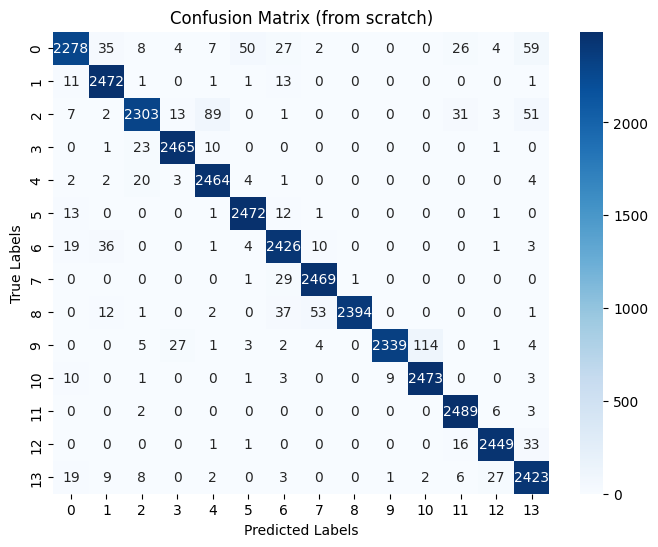

In [3]:
# Question 1, part 5 :: uni + Bigram without stemming or removing stop words
df_train, vocabularyTitle = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "title", target_col = "Tokenized Title", remove_stop_words = False, with_stemming = False, window = [1,2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "title", target_col = "Tokenized Title", remove_stop_words = False, with_stemming = False, window = [1,2])

df_train, vocabularyContent = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "content", target_col = "Tokenized Description", remove_stop_words = False, with_stemming = False, window = [1,2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "content", target_col = "Tokenized Description", remove_stop_words = False, with_stemming = False, window = [1,2])

trainingData, testingData = getTrainingAndTestingData2(df_train, df_test, target_field1 = "Tokenized Title", target_field2 = "Tokenized Description")
    
# 1. unigram - without stem - without stop words - done
model = NaiveBayesCustom() 
print("--------UNI+BIGRAM -- WITHOUT STEMMING -- WITHOUT STOP WORDS REMOVAL---------")
results["UNI+BIGRAM-WITHOUT STEMMING-WITHOUT STOP WORDS REMOVAL"] = run_model2(model, vocabularyTitle, vocabularyContent, trainingData, testingData, smoothening = 1.0, text_col1 = "Tokenized Title", text_col2 = "Tokenized Description")
# Since this is my best model :: lets build the confusion matrix for the same
cm = ConfusionMatrix(testingData["Class Index"], testingData["Predicted"])
cm.report()
cm.plot()

In [8]:
# Question 1, part 6 :: uni + Bigram with stemming or removing stop words
df_train, vocabularyTitle = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "title", target_col = "Tokenized Title", remove_stop_words = True, with_stemming = True, window = [1,2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "title", target_col = "Tokenized Title", remove_stop_words = True, with_stemming = True, window = [1,2])

df_train, vocabularyContent = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_train, "content", target_col = "Tokenized Description", remove_stop_words = True, with_stemming = True, window = [1,2])
df_test, _ = tokenizeAndRemoveStopWordsOrStemAndReturnVocabulary(df_test, "content", target_col = "Tokenized Description", remove_stop_words = True, with_stemming = True, window = [1,2])

trainingData, testingData = getTrainingAndTestingData2(df_train, df_test, target_field1 = "Tokenized Title", target_field2 = "Tokenized Description")
    
# 1. unigram - without stem - without stop words - done
model = NaiveBayesCustom() 
print("--------UNI+BIGRAM -- WITH STEMMING -- WITH STOP WORDS REMOVAL---------")
results["UNI+BIGRAM-WITH STEMMING-WITH STOP WORDS REMOVAL"] = run_model2(model, vocabularyTitle, vocabularyContent, trainingData, testingData, smoothening = 1.0, text_col1 = "Tokenized Title", text_col2 = "Tokenized Description")


Training Data Sample:
                                     Tokenized Title  \
0                              [erni, cox, erni cox]   
1                                        [holosteum]   
2        [pestarella, tyrrhena, pestarella tyrrhena]   
3  [midsun, junior, high, school, midsun junior, ...   
4  [st, james', church, wrightington, bar, st jam...   

                               Tokenized Description  Class Index  
0  [ernest, erni, cox, (februari, 17, 1894, –, fe...            3  
1  [holosteum, genu, plant, pink, famili, (caryop...           10  
2  [pestarella, tyrrhena, (formerli, callianassa,...            9  
3  [midsun, junior, high, school, canadian, middl...            1  
4  [st, james', church, wrightington, bar, church...            6  

Testing Data Sample:
                                     Tokenized Title  \
0                          [lajo, draho, lajo draho]   
1  [uss, huntsvil, (1857), uss huntsvil, huntsvil...   
2                                         

IOStream.flush timed out


Predictions added to column 'Predicted'.
Evaluating on train data...
Evaluating on 140000 examples
Overall Accuracy: 99.51%

Class 0 -> Precision: 0.9923, Recall: 0.9826, F1-Score: 0.9874
Class 1 -> Precision: 0.9908, Recall: 0.9971, F1-Score: 0.9939
Class 2 -> Precision: 0.9966, Recall: 0.9891, F1-Score: 0.9928
Class 3 -> Precision: 0.9960, Recall: 0.9988, F1-Score: 0.9974
Class 4 -> Precision: 0.9952, Recall: 0.9952, F1-Score: 0.9952
Class 5 -> Precision: 0.9959, Recall: 0.9983, F1-Score: 0.9971
Class 6 -> Precision: 0.9905, Recall: 0.9940, F1-Score: 0.9923
Class 7 -> Precision: 0.9962, Recall: 0.9993, F1-Score: 0.9978
Class 8 -> Precision: 0.9999, Recall: 0.9918, F1-Score: 0.9958
Class 9 -> Precision: 0.9997, Recall: 0.9961, F1-Score: 0.9979
Class 10 -> Precision: 0.9979, Recall: 0.9979, F1-Score: 0.9979
Class 11 -> Precision: 0.9915, Recall: 0.9990, F1-Score: 0.9952
Class 12 -> Precision: 0.9965, Recall: 0.9969, F1-Score: 0.9967
Class 13 -> Precision: 0.9926, Recall: 0.9954, F1-Sco

In [9]:
display_results_table(results)


Model: UNIGRAM-WITHOUT STEMMING-WITHOUT STOP WORDS REMOVAL
╒══════════════════════╤═════════╤═════════╕
│ Metric               │   Train │    Test │
╞══════════════════════╪═════════╪═════════╡
│ Overall Accuracy (%) │ 98.2    │ 96.45   │
├──────────────────────┼─────────┼─────────┤
│ Overall Precision    │  0.982  │  0.9645 │
├──────────────────────┼─────────┼─────────┤
│ Overall Recall       │  0.982  │  0.9645 │
├──────────────────────┼─────────┼─────────┤
│ Overall F1 Score     │  0.982  │  0.9645 │
├──────────────────────┼─────────┼─────────┤
│ Macro F1 Score       │  0.9819 │  0.9644 │
╘══════════════════════╧═════════╧═════════╛

Model: UNIGRAM-WITH STEMMING-WITH STOP WORDS REMOVAL
╒══════════════════════╤═════════╤═════════╕
│ Metric               │   Train │    Test │
╞══════════════════════╪═════════╪═════════╡
│ Overall Accuracy (%) │ 97.97   │ 95.91   │
├──────────────────────┼─────────┼─────────┤
│ Overall Precision    │  0.9797 │  0.9591 │
├──────────────────────┼───────